<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Zalando%20Clothing%20Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

- Install Monk
  - Using pip (Recommended)
  - Manually (Not recommended)
- Demo of Zalando Clothing Store Classifier
- Download Dataset
- Background work
- Training from scratch: vgg16
  - Analyzing Learning Rates
  - Analyzing Batch Sizes
  - Analyzing Optimizers
- Summary of Hyperparameter Tuning Experiment
- Expert Mode
- Validation
- Inference
- Training from scratch: mobilenet_v2
- Expert Mode
- Comparing vgg16 and mobilenet_v2
- Conclusion

# Install Monk

## Using pip (Recommended)
- colab (gpu)
  - All bakcends: !pip install -U monk-colab
- kaggle (gpu)
  - All backends: !pip install -U monk-kaggle
- cuda 10.2
  - All backends: pip install -U monk-cuda102
  - Gluon bakcned: pip install -U monk-gluon-cuda102
  - Pytorch backend: pip install -U monk-pytorch-cuda102
  - Keras backend: pip install -U monk-keras-cuda102
- cuda 10.1
  - All backend: pip install -U monk-cuda101
  - Gluon bakcned: pip install -U monk-gluon-cuda101
  - Pytorch backend: pip install -U monk-pytorch-cuda101
  - Keras backend: pip install -U monk-keras-cuda101
- cuda 10.0
  - All backend: pip install -U monk-cuda100
  - Gluon bakcned: pip install -U monk-gluon-cuda100
  - Pytorch backend: pip install -U monk-pytorch-cuda100
  - Keras backend: pip install -U monk-keras-cuda100
- cuda 9.2
  - All backend: pip install -U monk-cuda92
  - Gluon bakcned: pip install -U monk-gluon-cuda92
  - Pytorch backend: pip install -U monk-pytorch-cuda92
  - Keras backend: pip install -U monk-keras-cuda92
- cuda 9.0
  - All backend: pip install -U monk-cuda90
  - Gluon bakcned: pip install -U monk-gluon-cuda90
  - Pytorch backend: pip install -U monk-pytorch-cuda90
  - Keras backend: pip install -U monk-keras-cuda90
- cpu
  - All backend: pip install -U monk-cpu
  - Gluon bakcned: pip install -U monk-gluon-cpu
  - Pytorch backend: pip install -U monk-pytorch-cpu
  - Keras backend: pip install -U monk-keras-cpu

## Install Monk Manually (Not recommended)
### Step 1: Clone the library
- git clone https://github.com/Tessellate-Imaging/monk_v1.git

### Step 2: Install requirements
- Linux
  - Cuda 9.0
    - cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt
  - Cuda 9.2
    - cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt
  - Cuda 10.0
    - cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt
  - Cuda 10.1
    - cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt
  - Cuda 10.2
    - cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt
  - CPU (Non gpu system)
    - cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt
- Windows
    - Cuda 9.0 (Experimental support)
      - cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt
    - Cuda 9.2 (Experimental support)
      - cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt
    - Cuda 10.0 (Experimental support)
      - cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt
    - Cuda 10.1 (Experimental support)
      - cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt
    - Cuda 10.2 (Experimental support)
      - cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt
    - CPU (Non gpu system)
      - cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt
- Mac
    - CPU (Non gpu system)
      - cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt
- Misc
    - Colab (GPU)
      - cd monk_v1/installation/Misc && pip install -r requirements_colab.txt
    - Kaggle (GPU)
      - cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

### Step 3: Add to system path (Required for every terminal or kernel run)

```python
import sys
sys.path.append("monk_v1/")
```


# Demo of Zalando Clothing Store Classifier

In [ ]:
# Use this command if you're working on colab.
!pip install -U monk-colab

In [3]:
import sys
sys.path.append("monk_v1/")

This section is to give you a demo of this classifier before getting into further details.

Let's first download the weights.

In [4]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SO7GUcZlo8jRtLnGa6cBn2MGESyb1mUm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SO7GUcZlo8jRtLnGa6cBn2MGESyb1mUm" -O cls_zalando_trained.zip && rm -rf /tmp/cookies.txt

--2020-08-03 14:32:14--  https://docs.google.com/uc?export=download&id=1SO7GUcZlo8jRtLnGa6cBn2MGESyb1mUm
Resolving docs.google.com (docs.google.com)... 173.194.79.101, 173.194.79.139, 173.194.79.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-08-03 14:32:14 (48.9 MB/s) - written to stdout [3258]

--2020-08-03 14:32:14--  https://docs.google.com/uc?export=download&confirm=PTHM&id=1SO7GUcZlo8jRtLnGa6cBn2MGESyb1mUm
Resolving docs.google.com (docs.google.com)... 173.194.79.138, 173.194.79.100, 173.194.79.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-0s-docs.googleusercontent.com/docs/securesc/8adfs12eehb39po17suoef1ooh5fm58h/qho4rtaegs

Unzip the folder.

In [5]:
! unzip -qq cls_zalando_trained.zip

In [10]:
ls workspace/

comparison/  Project-Zalando/  test/


There are 3 folders for you to explore:

1. comparison
  - To check all the comparisons between different models and hyperparameters.
2. Project-Zalando
  - Final weights and logs.
3. test
  - images to test the model.

In [6]:
ls workspace/Project-Zalando/

expert_mode_vgg16/


`expert_mode_vgg16` is our final model.

In [8]:
#Using keras backend 
from monk.keras_prototype import prototype

### Infer

In [9]:
ktf = prototype(verbose=1)
ktf.Prototype("Project-Zalando", "expert_mode_vgg16", eval_infer=True)

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Test transforms not found.
Add test transforms

Model Details
    Loading model - workspace/Project-Zalando/expert_mode_vgg16/output/models/final.h5

    Model loaded!

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_vgg16
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_vgg16/



Prediction
    Image name:         /content/workspace/test/0DB22O007-A11@8.jpg
    Predicted class:      shirt
    Predicted score:      0.9921546578407288



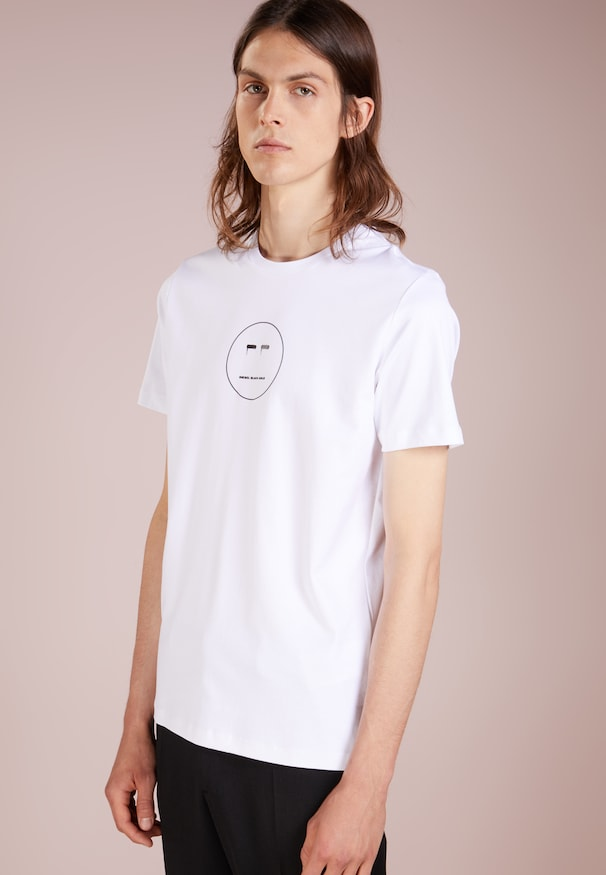

In [12]:
img_name = "/content/workspace/test/0DB22O007-A11@8.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/workspace/test/1FI21J00A-A11@10.jpg
    Predicted class:      sweatshirt
    Predicted score:      0.9308866858482361



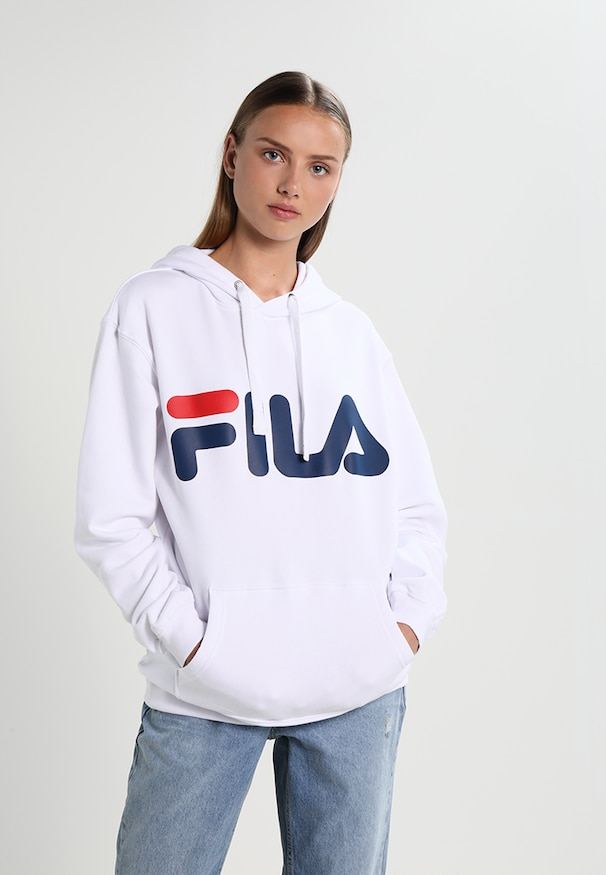

In [13]:
img_name = "/content/workspace/test/1FI21J00A-A11@10.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

# Download Dataset

Let's install dataset using Kaggle's API Commands. Before doing that, follow below steps:

Go to your Kaggle Profile > My Account > Scroll down to find *API* section > Click on Expire API Token > Now, click on *Create new API Token* > Save *kaggle.json* on your local system.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

Upload your *kaggle.json* file here.

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Time for downloading your dataset. Go to the dataset you want to download on Kaggle and copy the API command which Kaggle provides. That should look like below:

In [ ]:
! kaggle datasets download -d dqmonn/zalando-store-crawl

In [ ]:
! unzip -qq zalando-store-crawl.zip -d zalando

After unzipping the file, store your dataset/files in your own *Google Drive* for future experiments.

In [ ]:
%cd /content/drive/My Drive/Data
%cp -av /content/zalando/zalando zalando

# Background work

**1. Question**: Which backend should I select to train my classifier?

**Answer**: Follow the below tutorial to compare experiments across backends.
  -  https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/4)%20Feature%20-%20Compare%20experiments%20-%20compare%20experiments%20across%20backends.ipynb 

**2. Question**: Which model should I select to train my classifier after selecting the backend?

**Answer**: In the current experiment, I've selected **Keras** backend to train my classifier. So, use the following code to list all the models which are available under Keras.

```python
#Using keras backend 
from keras_prototype import prototype

ktf = prototype(verbose=1)
ktf.List_Models()

Models List: 
    1. mobilenet
    2. densenet121
    3. densenet169
    4. densenet201
    5. inception_v3
    6. inception_resnet_v3
    7. mobilenet_v2
    8. nasnet_mobile
    9. nasnet_large
    10. resnet50
    11. resnet101
    12. resnet152
    13. resnet50_v2
    14. resnet101_v2
    15. resnet152_v2
    16. vgg16
    17. vgg19
    18. xception
```

Now, you can select any 3-5 models to start doing your experiments. Follow the below tutorial to compare experiments within same backend:
  - https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/3)%20Feature%20-%20Compare%20experiments%20-%20compare%20experiments%20within%20same%20backend.ipynb

# Import Monk

In [ ]:
#Using keras backend 
from monk.keras_prototype import prototype

You can create multiple experiments under one Project. Here, my Project is named as **Project-Zalando** and my first experiment is named as **vgg16_exp1**.

In [ ]:
ktf = prototype(verbose=1)
ktf.Prototype("Project-Zalando", "vgg16_exp1")

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Experiment Details
    Project: Project-Zalando
    Experiment: vgg16_exp1
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/vgg16_exp1/



You can use the following code to train your model with default Parameters. However, our goal is to increase the accuracy, hence, we will jump to *tune our hyperparameters*. Use the below link to learn how to do **hyperparameter tuning** for your classifier:
  - https://github.com/Tessellate-Imaging/monk_v1/tree/master/study_roadmaps/1_getting_started_roadmap/6_hyperparameter_tuning

In [ ]:
ktf.Default(dataset_path="/content/drive/My Drive/Data/zalando", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5)

#Read the summary generated once you run this cell.

Dataset Details
    Train path:     /content/drive/My Drive/Data/zalando
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 10709
    Num val images:   4584
    Num classes:      6

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Model Params
    Model name:           vgg16
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  False

Model Details
    

In [ ]:
ktf.Train()

# a. Analyse Learning Rates

In [ ]:
# Analysis Project Name
analysis_name = "analyse_learning_rates_vgg16"

In [ ]:
# Learning rates to explore
lrs = [0.1, 0.05, 0.01, 0.005, 0.0001]

In [ ]:
# Number of epochs for each sub-experiment to run
epochs=5

In [ ]:
# Percentage of original dataset to take in for experimentation
# We're taking 5% of our original dataset.
percent_data=5

In [ ]:
# I made sure that all the GPU processors are running
ktf.update_num_processors(2)

# Very important to reload post updating
ktf.Reload()

Update: Num processors - 2

Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 10709
    Num val images:   4584
    Num classes:      6

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num layers in model:  15
        Num trainable layers: 15



In [ ]:
# "keep_all" - Keep all the sub experiments created
# "keep_none" - Delete all sub experiments created
analysis = ktf.Analyse_Learning_Rates(analysis_name, lrs, percent_data, 
                                      num_epochs=epochs, state="keep_none")


Running Learning rate analysis
Analysis Name      : analyse_learning_rates_vgg16

Running experiment : 1/5
Experiment name    : Learning_Rate_0.1
Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Found 686 validated image filenames belonging to 6 classes.
Found 76 validated image filenames belonging to 6 classes.
Found 77 validated image filenames belonging to 6 classes.
Estimated time     : 24 min

Epoch 00001: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.
Experiment Complete


Running experiment : 2/5
Experiment name    : Learning_Rate_0.05
Found 10709 images belonging to 6 classes.
Found 4584 images belonging t

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Result

From the above table, it is clear that `Learning_Rate_0.0001` has the **least validation loss**. We will update our learning rate with this.

In [ ]:
ktf.update_learning_rate(0.0001)

# Very important to reload post updates
ktf.Reload()

Update: Learning Rate - 0.0001

Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 10709
    Num val images:   4584
    Num classes:      6

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num layers in model:  15
        Num trainable layers: 15



# b. Analyse Batch sizes

In [ ]:
# Analysis Project Name
analysis_name = "analyse_batch_sizes_vgg16"

In [ ]:
# Batch sizes to explore
batch_sizes = [2, 4, 8, 12]

**Note:** We're using the same `percent_data` and `num_epochs`.

In [ ]:
# "keep_all" - Keep all the sub experiments created
# "keep_none" - Delete all sub experiments created
analysis_batches = ktf.Analyse_Batch_Sizes(analysis_name, batch_sizes, 
                                   percent_data, num_epochs=epochs, state="keep_none")


Running Batch Size analysis
Analysis Name      : analyse_batch_sizes_vgg16

Running experiment : 1/4
Experiment name    : Batch_Size_2
Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Found 686 validated image filenames belonging to 6 classes.
Found 76 validated image filenames belonging to 6 classes.
Found 77 validated image filenames belonging to 6 classes.
Estimated time     : 5 min

Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Experiment Complete


Running experiment : 2/4
Experiment name    : Batch_Size_4
Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Found 686 validated image filenames belonging to 6 classes.
Found 76 validated image filenames belonging to 6 classes.
Found 77 validated image filenames belonging to 6 classes.
Estimated time     : 4 min

Epoch 00002: ReduceLROnPlateau reducing 

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Result

From the above table, it is clear that `Batch_Size_12` has the **least validation loss**. We will update the model with this.

In [ ]:
ktf.update_batch_size(12)

# Very important to reload post updates
ktf.Reload()

Update: Batch size - 12

Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 10709
    Num val images:   4584
    Num classes:      6

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num layers in model:  15
        Num trainable layers: 15



# c. Analyse Optimizers

In [ ]:
# Analysis Project Name
analysis_name = "analyse_optimizers_vgg16"

In [ ]:
# Optimizers to explore
optimizers = ["sgd", "adam", "adagrad"]

In [ ]:
# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
analysis_optimizers = ktf.Analyse_Optimizers(analysis_name, optimizers, percent_data, 
                                  num_epochs=epochs, state="keep_none")


Running Optimizer analysis
Analysis Name      : analyse_optimizers_vgg16

Running experiment : 1/3
Experiment name    : Optimizer_sgd
Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Found 686 validated image filenames belonging to 6 classes.
Found 76 validated image filenames belonging to 6 classes.
Found 77 validated image filenames belonging to 6 classes.
Estimated time     : 3 min

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Experiment Complete


Running experiment : 2/3
Experiment name    : Optimizer_adam
Found 10709 images belonging to 6 classes.
Found 4584 images belonging to 6 classes.
Found 686 validated image filenames belonging to 6 classes.
Found 76 validated image filenames belonging to 6 classes.
Found 77 validated image filenames belonging to 6 classes.
Estimated time     : 3 min

Epoch 00002: ReduceLROnPlateau reducing

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Result

From the above table, it is clear that we should go for `Optimizer_adagrad` since it has the least validation loss.

# Summary of Hyperparameter Tuning Experiment

Here ends our experiment and now it's time to switch on the **Expert Mode** to train our Classifier using the above **Hyperparameters**.

Summary:

- Learning Rate - 0.0001
- Batch size - 12
- Optimizer - adagrad

---

# Training from scratch: vgg16

# Expert Mode

Let's create another *Experiment* named **expert_mode_vgg16** and train our classifier from the scratch.

In [ ]:
ktf = prototype(verbose=1);
ktf.Prototype("Project-Zalando", "expert_mode_vgg16")

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_vgg16
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_vgg16/



In [ ]:
ktf.Dataset_Params(dataset_path="/content/drive/My Drive/Data/zalando", 
                   
                   split=0.8,
                    
                   input_size=224, 
                   
                   batch_size=12, # updated
                   
                   shuffle_data=True, 
                   
                   num_processors=2)

Dataset Details
    Train path:     /content/drive/My Drive/Data/zalando
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   12
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.8



In [ ]:
# Load the dataset
ktf.Dataset()

Found 12239 images belonging to 6 classes.
Found 3054 images belonging to 6 classes.
Pre-Composed Train Transforms
[]

Pre-Composed Val Transforms
[]

Dataset Numbers
    Num train images: 12239
    Num val images:   3054
    Num classes:      6



In [ ]:
ktf.Model_Params(model_name="vgg16", 
                 
                 freeze_base_network=True, 
                 
                 use_gpu=True, 
                 
                 use_pretrained=True)

Model Params
    Model name:           vgg16
    Use Gpu:              True
    Gpu Memory Fraction:  0.5
    Use pretrained:       True
    Freeze base network:  True



In [ ]:
ktf.Model()

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num layers in model:  15
        Num trainable layers: 2



In [ ]:
ktf.Training_Params(num_epochs=5, 
                    
                    display_progress=True, 
                    
                    display_progress_realtime=True, 
        
                    save_intermediate_models=True, 
                    
                    intermediate_model_prefix="intermediate_model_", 
                    
                    save_training_logs=True)

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



In [ ]:
# Update optimizer and learning rate
ktf.optimizer_adagrad(0.0001)

Optimizer
    Name:          adagrad
    Learning rate: 0.0001
    Params:        {'lr': 0.0001, 'lr_decay': 0, 'epsilon': 1e-08, 'weight_decay': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





In [ ]:
ktf.loss_crossentropy()

Loss
    Name:          crossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
# Training
ktf.Train()

Training Start
Epoch 1/5
1019/1019 [==============================] - 264s 259ms/step - loss: 3.4228 - accuracy: 0.4062 - val_loss: 2.2705 - val_accuracy: 0.4843

Epoch 00001: saving model to workspace/Project-Zalando/expert_mode_vgg16/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 2.27049, saving model to workspace/Project-Zalando/expert_mode_vgg16/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project-Zalando/expert_mode_vgg16/output/models/intermediate_model_01.h5
Epoch 2/5
1019/1019 [==============================] - 266s 261ms/step - loss: 3.0663 - accuracy: 0.4257 - val_loss: 1.9162 - val_accuracy: 0.4993

Epoch 00002: saving model to workspace/Project-Zalando/expert_mode_vgg16/output/models/resume_state.h5

Epoch 00002: val_loss improved from 2.27049 to 1.91616, saving model to workspace/Project-Zalando/expert_mode_vgg16/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project-Zalando/expert_mode_vgg16/output/mod

<Figure size 432x288 with 0 Axes>

# Validation

Running the validation on the same dataset.

In [ ]:
ktf = prototype(verbose=1);
ktf.Prototype("Project-Zalando", "expert_mode_vgg16", eval_infer=True)

# Just for example purposes, validating on the training set itself
ktf.Dataset_Params(dataset_path="/content/drive/My Drive/Data/zalando")
ktf.Dataset()

accuracy, class_based_accuracy = ktf.Evaluate()

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Test transforms not found.
Add test transforms

Model Details
    Loading model - workspace/Project-Zalando/expert_mode_vgg16/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_vgg16
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_vgg16/

Dataset Details
    Test path:     /content/drive/My Drive/Data/zalando
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   2

Found 15293 images belonging to 6 classes.
Pre-Composed Test Transforms
[]

Dataset Numbers
    Num test images: 15293
    Num classes:      6

Testing
15293/15293 [==============================] - 379s 25ms/step

    Result
        class based accuracies
            0. hoodies - 36.35090993933738 %
            1. hoodies-female - 16.459884201819687 %
            2. longsleeve - 24.42613301942319 %
            3. shirt - 94.77970348715807 %
            4.

# Inference

Let's see the Prediction on sample images.

In [ ]:
ktf = prototype(verbose=1)
ktf.Prototype("Project-Zalando", "expert_mode_vgg16", eval_infer=True)

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Test transforms not found.
Add test transforms

Model Details
    Loading model - workspace/Project-Zalando/expert_mode_vgg16/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_vgg16
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_vgg16/



Prediction
    Image name:         /content/1FI21J00A-A11@10.jpg
    Predicted class:      sweatshirt
    Predicted score:      0.9308865666389465



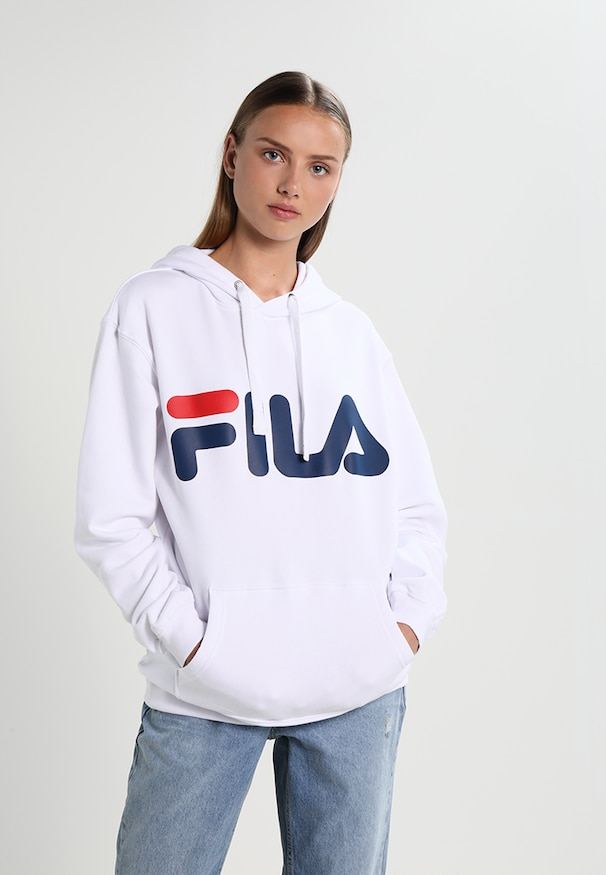

In [ ]:
img_name = "/content/1FI21J00A-A11@10.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/0DB22O007-A11@8.jpg
    Predicted class:      shirt
    Predicted score:      0.9921546578407288



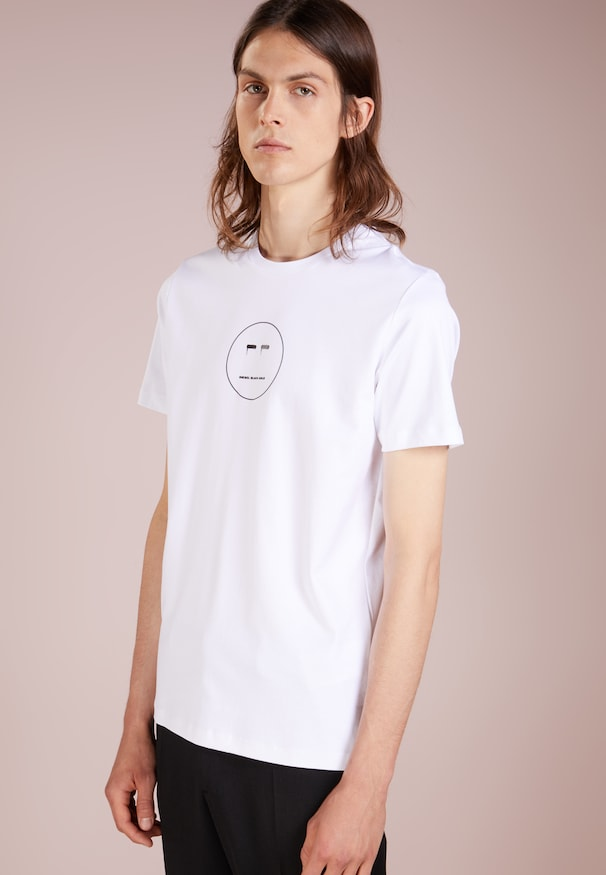

In [ ]:
img_name = "/content/0DB22O007-A11@8.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

We've successfully completed training our classifier. Check the *logs* and *models* folder under this *Experiment* to see the model weights and other insights.

---

# 2. Training from scratch: mobilenet_v2

I have gone ahead and trained `mobilenet_v2` from scratch in the same way to compare `vgg16` and `mobilenet_v2`.

After the experiment, the best hyperparameters for `mobilenet_v2` are:

- Learning Rate - 0.0001
- Batch Size - 8
- Optimizer - adam

# Expert Mode

In [ ]:
ktf = prototype(verbose=1);
ktf.Prototype("Project-Zalando", "expert_mode_mobilenet_v2")

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_mobilenet_v2
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_mobilenet_v2/



In [ ]:
ktf.Dataset_Params(dataset_path="/content/drive/My Drive/Data/zalando", 
                   
                   split=0.8,
                    
                   input_size=224, 
                   
                   batch_size=8, 
                   
                   shuffle_data=True, 
                   
                   num_processors=2)

Dataset Details
    Train path:     /content/drive/My Drive/Data/zalando
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   8
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.8



In [ ]:
ktf.Dataset()

Found 12239 images belonging to 6 classes.
Found 3054 images belonging to 6 classes.
Pre-Composed Train Transforms
[]

Pre-Composed Val Transforms
[]

Dataset Numbers
    Num train images: 12239
    Num val images:   3054
    Num classes:      6



In [ ]:
ktf.Model_Params(model_name="mobilenet_v2", 
                 
                 freeze_base_network=True, 
                 
                 use_gpu=True, 
                 
                 use_pretrained=True)

Model Params
    Model name:           mobilenet_v2
    Use Gpu:              True
    Gpu Memory Fraction:  0.5
    Use pretrained:       True
    Freeze base network:  True



In [ ]:
ktf.Model()

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           mobilenet_v2
        Num layers in model:  106
        Num trainable layers: 2



In [ ]:
ktf.Training_Params(num_epochs=5, 
                    
                    display_progress=True, 
                    
                    display_progress_realtime=True, 
        
                    save_intermediate_models=True, 
                    
                    intermediate_model_prefix="intermediate_model_", 
                    
                    save_training_logs=True)

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



In [ ]:
ktf.optimizer_adam(0.0001)

Optimizer
    Name:          adam
    Learning rate: 0.0001
    Params:        {'lr': 0.0001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'clipnorm': 0.0, 'clipvalue': 0.0}





In [ ]:
ktf.loss_crossentropy()

Loss
    Name:          crossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
ktf.Train()

Training Start
Epoch 1/5
1529/1529 [==============================] - 11087s 7s/step - loss: 1.2044 - accuracy: 0.5269 - val_loss: 2.5839 - val_accuracy: 0.3251

Epoch 00001: saving model to workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 2.58390, saving model to workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/intermediate_model_01.h5
Epoch 2/5
1529/1529 [==============================] - 208s 136ms/step - loss: 0.9947 - accuracy: 0.5965 - val_loss: 1.2082 - val_accuracy: 0.3322

Epoch 00002: saving model to workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/resume_state.h5

Epoch 00002: val_loss improved from 2.58390 to 1.20817, saving model to workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project-Za

<Figure size 432x288 with 0 Axes>

# Validation

In [ ]:
ktf = prototype(verbose=1);
ktf.Prototype("Project-Zalando", "expert_mode_mobilenet_v2", eval_infer=True)

# Just for example purposes, validating on the training set itself
ktf.Dataset_Params(dataset_path="/content/drive/My Drive/Data/zalando")
ktf.Dataset()

accuracy, class_based_accuracy = ktf.Evaluate()

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Test transforms not found.
Add test transforms

Model Details
    Loading model - workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_mobilenet_v2
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_mobilenet_v2/

Dataset Details
    Test path:     /content/drive/My Drive/Data/zalando
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   2

Found 15293 images belonging to 6 classes.
Pre-Composed Test Transforms
[]

Dataset Numbers
    Num test images: 15293
    Num classes:      6

Testing
15293/15293 [==============================] - 355s 23ms/step

    Result
        class based accuracies
            0. hoodies - 2.1931871208586093 %
            1. hoodies-female - 0.0 %
            2. longsleeve - 0.23543260741612712 %
            3. shirt - 76.59219043641679 %
     

# Inference

In [ ]:
ktf = prototype(verbose=1)
ktf.Prototype("Project-Zalando", "expert_mode_mobilenet_v2", eval_infer=True)

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Test transforms not found.
Add test transforms

Model Details
    Loading model - workspace/Project-Zalando/expert_mode_mobilenet_v2/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project-Zalando
    Experiment: expert_mode_mobilenet_v2
    Dir: /content/drive/My Drive/Monk_v1/workspace/Project-Zalando/expert_mode_mobilenet_v2/



Prediction
    Image name:         /content/0DB22O007-A11@8.jpg
    Predicted class:      shirt
    Predicted score:      0.37532666325569153



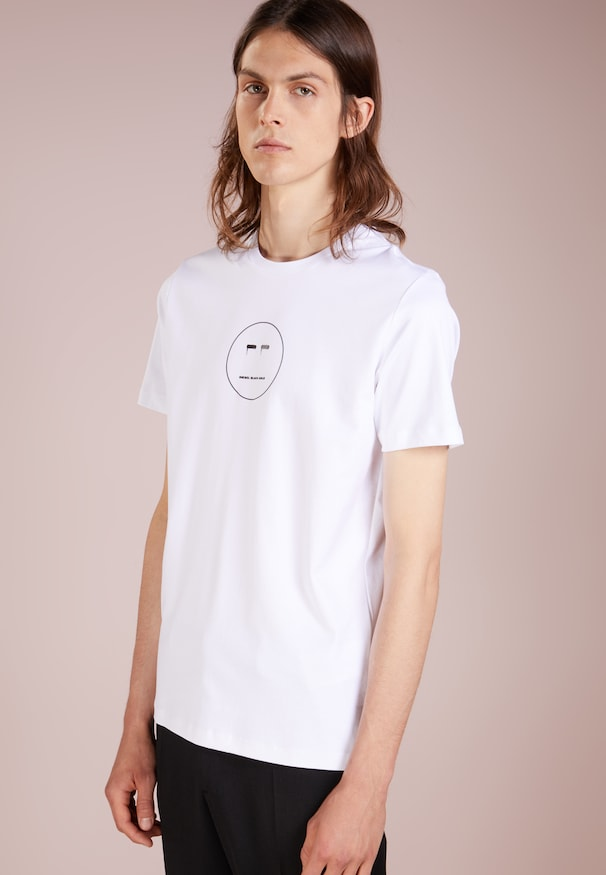

In [ ]:
img_name = "/content/0DB22O007-A11@8.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/TOB22O01W-A11@8.jpg
    Predicted class:      sweatshirt
    Predicted score:      0.3768783211708069



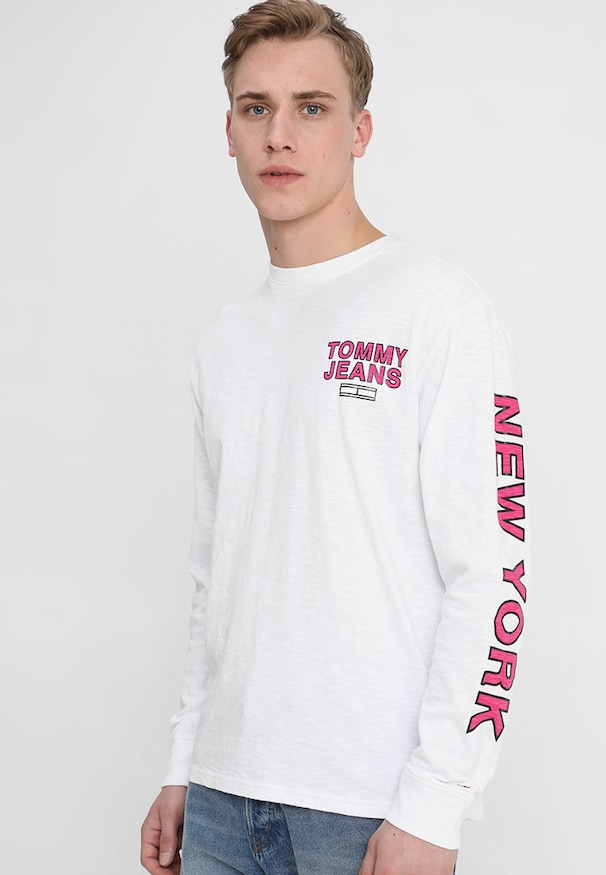

In [ ]:
img_name = "/content/TOB22O01W-A11@8.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/1FI21J00A-A11@10.jpg
    Predicted class:      sweatshirt
    Predicted score:      0.3762810230255127



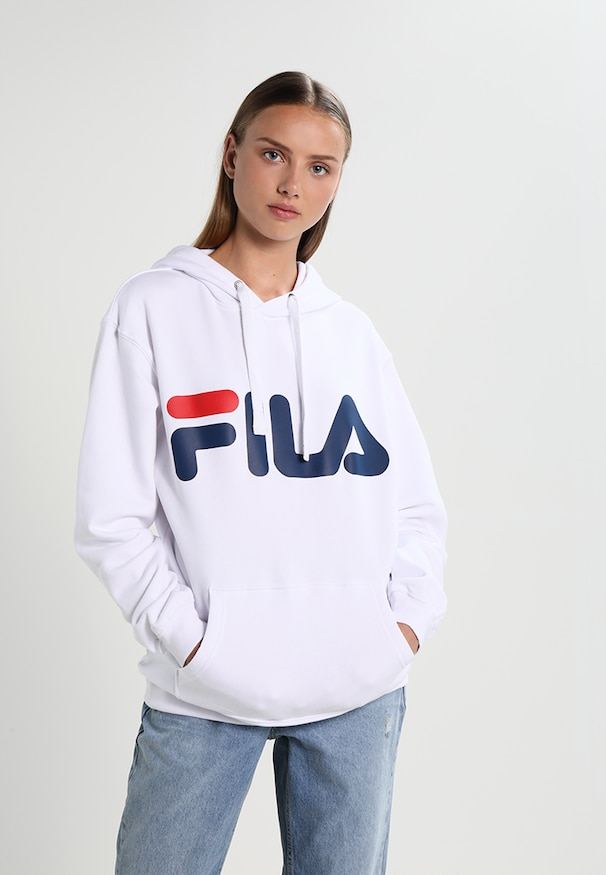

In [ ]:
img_name = "/content/1FI21J00A-A11@10.jpg"
predictions = ktf.Infer(img_name=img_name)

#Display 
from IPython.display import Image
Image(filename=img_name)

# Comparing vgg16 and mobilenet_v2

I've used the same tutorial which I mentioned previously to compare these two experiments.

Link: https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/4)%20Feature%20-%20Compare%20experiments%20-%20compare%20experiments%20across%20backends.ipynb

In [ ]:
# Invoke the comparison class
# import monk_v1
from compare_prototype import compare

In [ ]:
# Create a project 
ctf = compare(verbose=1);
ctf.Comparison("vgg-mobilenet-Comparison")

Comparison: - vgg-mobilenet-Comparison


In [ ]:
ctf.Add_Experiment("Project-Zalando", "expert_mode_vgg16")
ctf.Add_Experiment("Project-Zalando", "expert_mode_mobilenet_v2")

Project - Project-Zalando, Experiment - expert_mode_vgg16 added
Project - Project-Zalando, Experiment - expert_mode_mobilenet_v2 added


In [ ]:
ctf.Generate_Statistics()

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

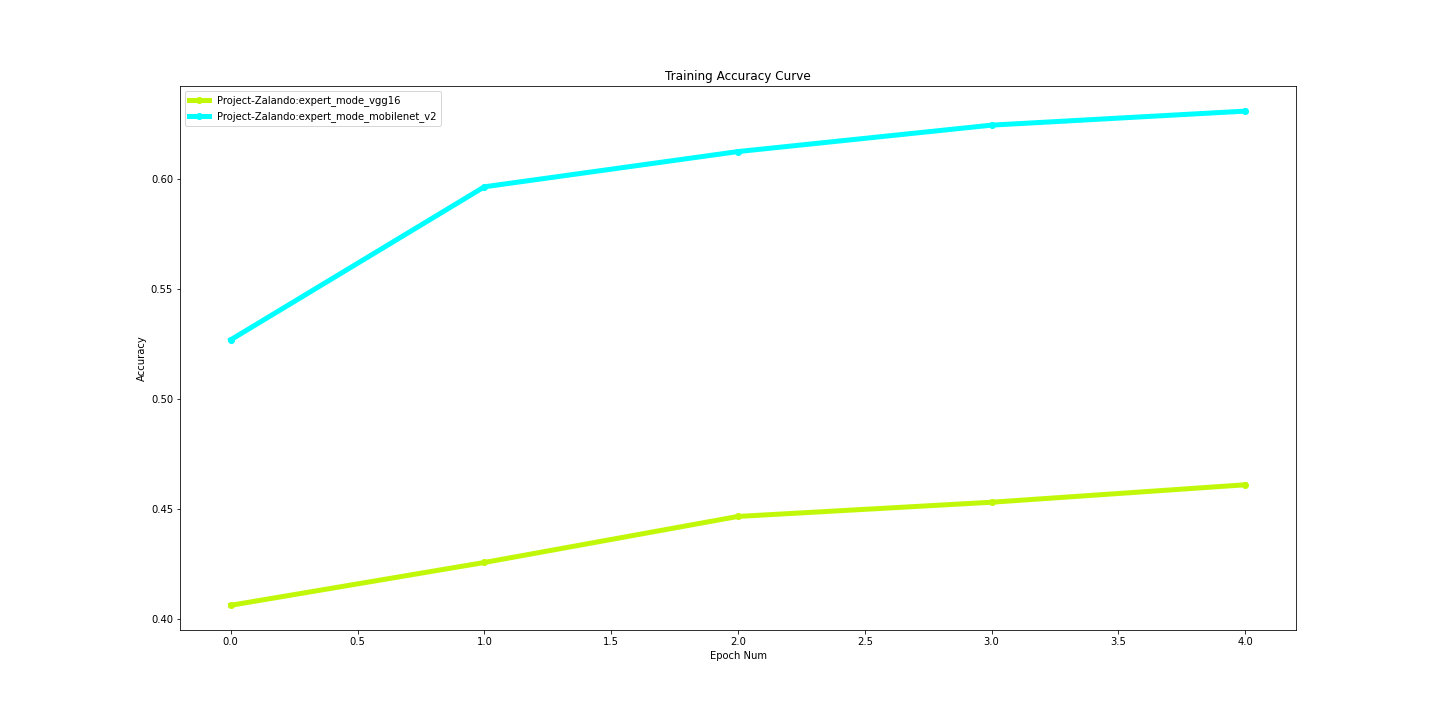

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Monk_v1/workspace/comparison/vgg-mobilenet-Comparison/train_accuracy.png")

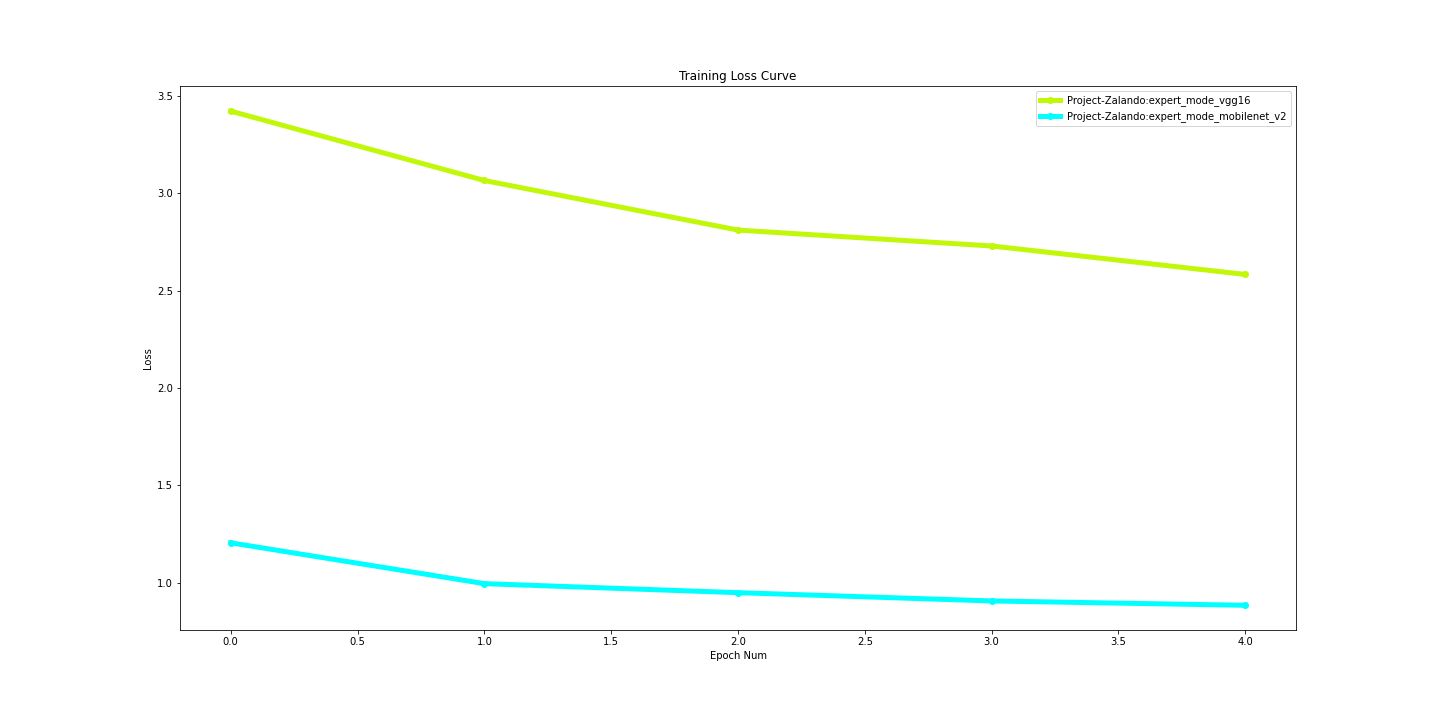

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Monk_v1/workspace/comparison/vgg-mobilenet-Comparison/train_loss.png")

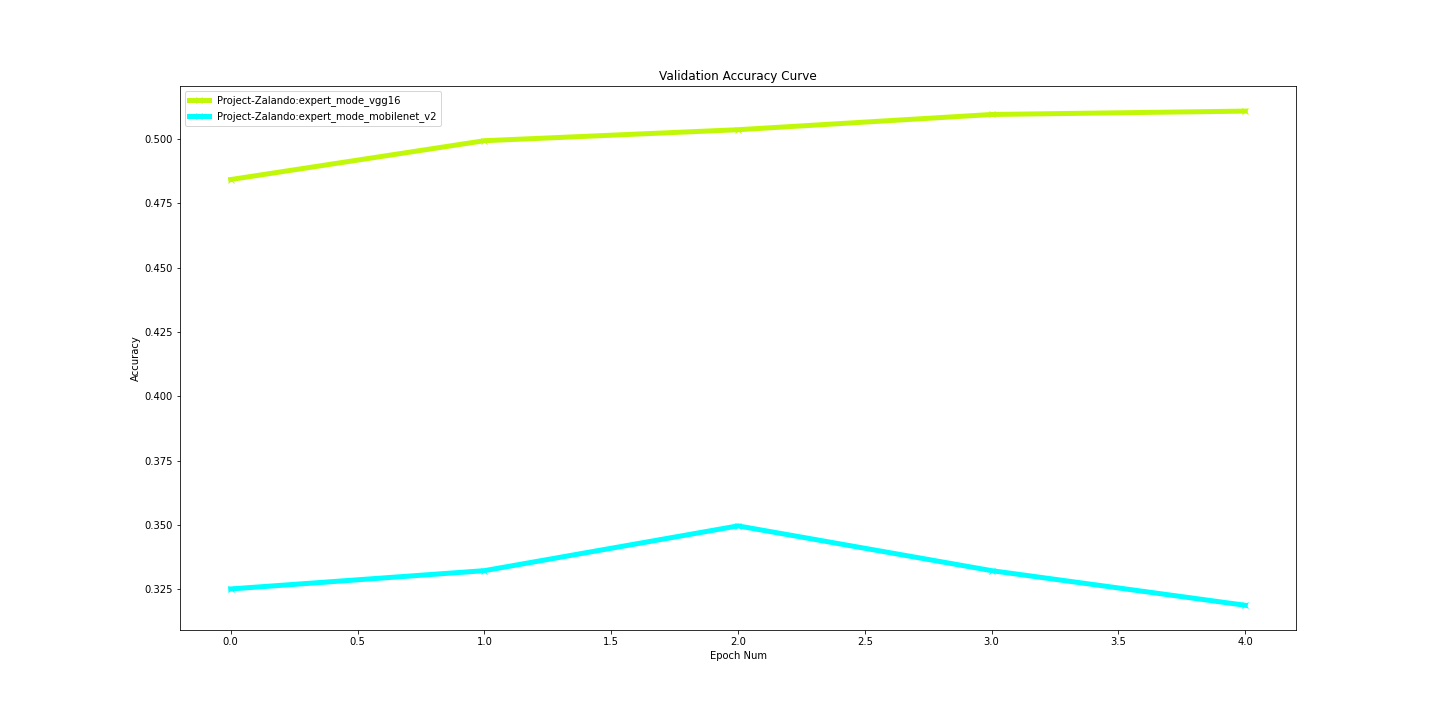

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Monk_v1/workspace/comparison/vgg-mobilenet-Comparison/val_accuracy.png")

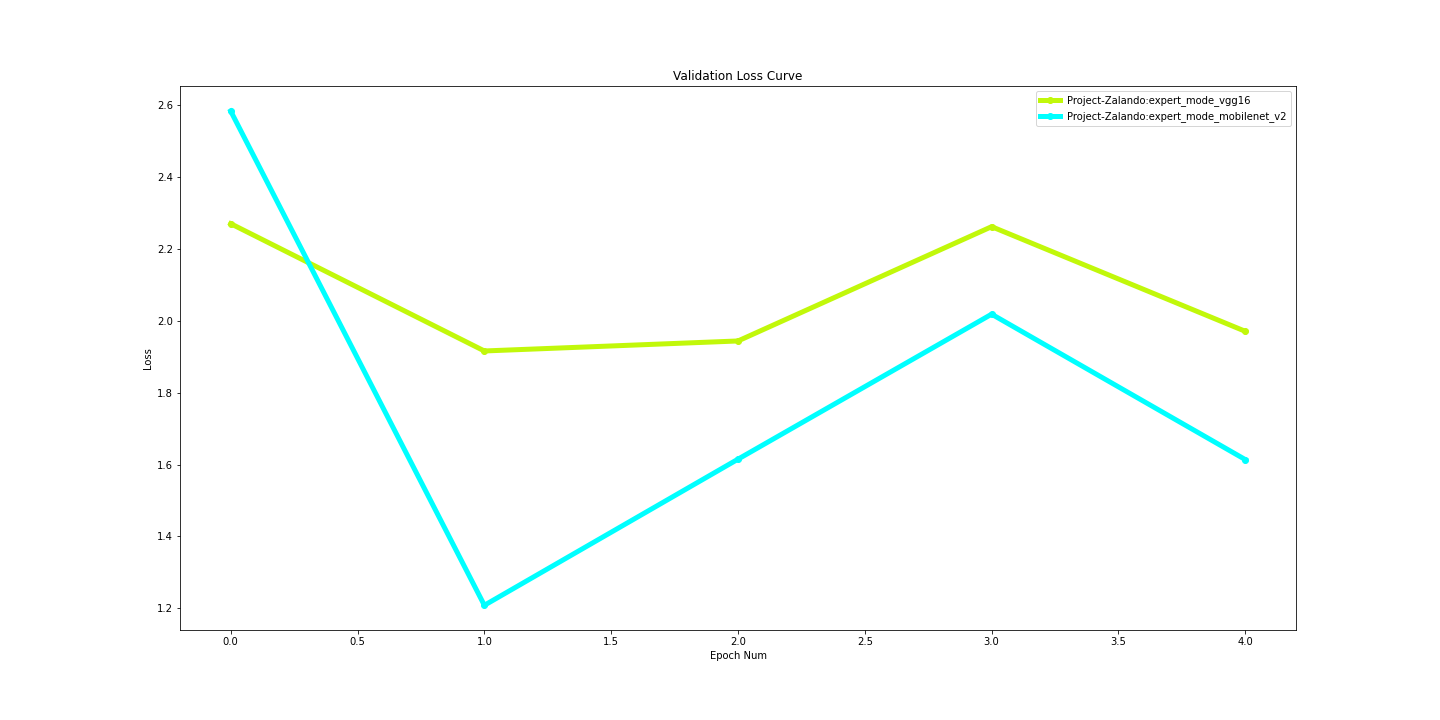

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Monk_v1/workspace/comparison/vgg-mobilenet-Comparison/val_loss.png")

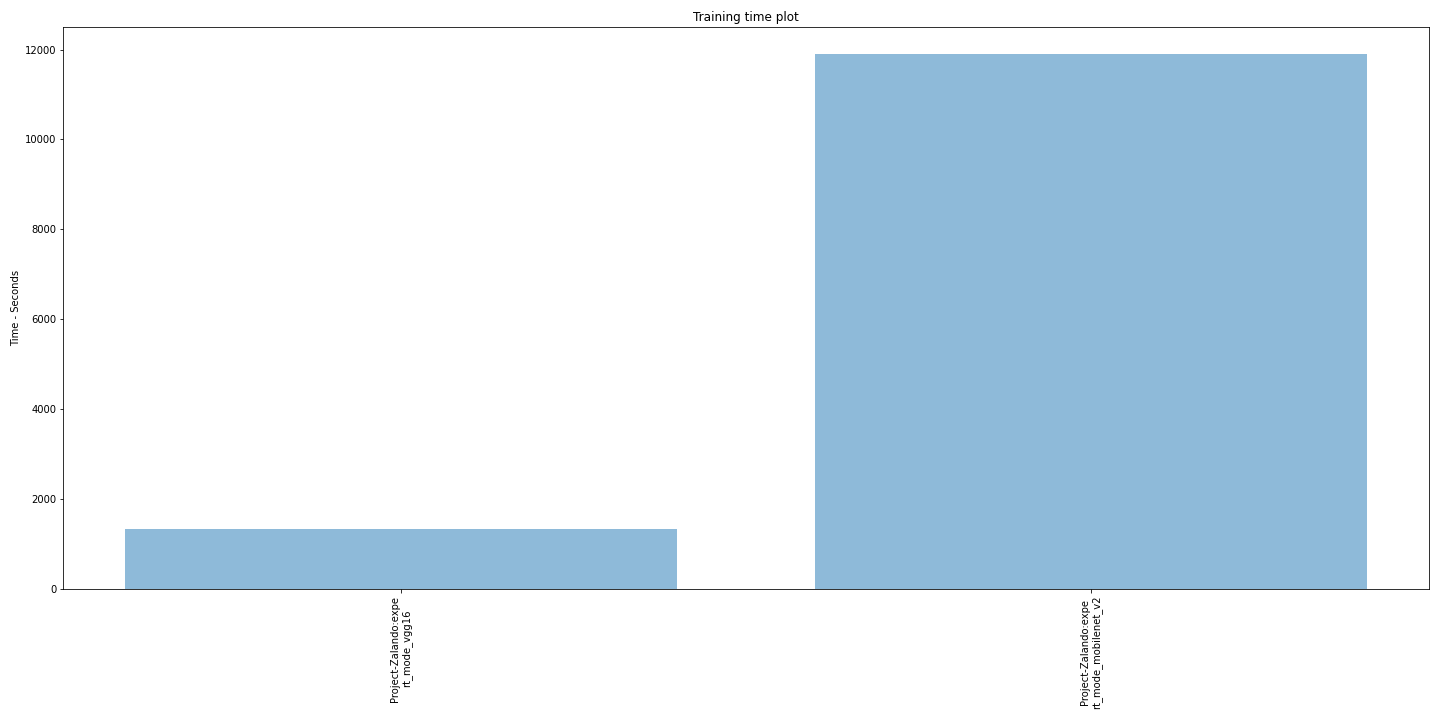

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Monk_v1/workspace/comparison/vgg-mobilenet-Comparison/stats_training_time.png")

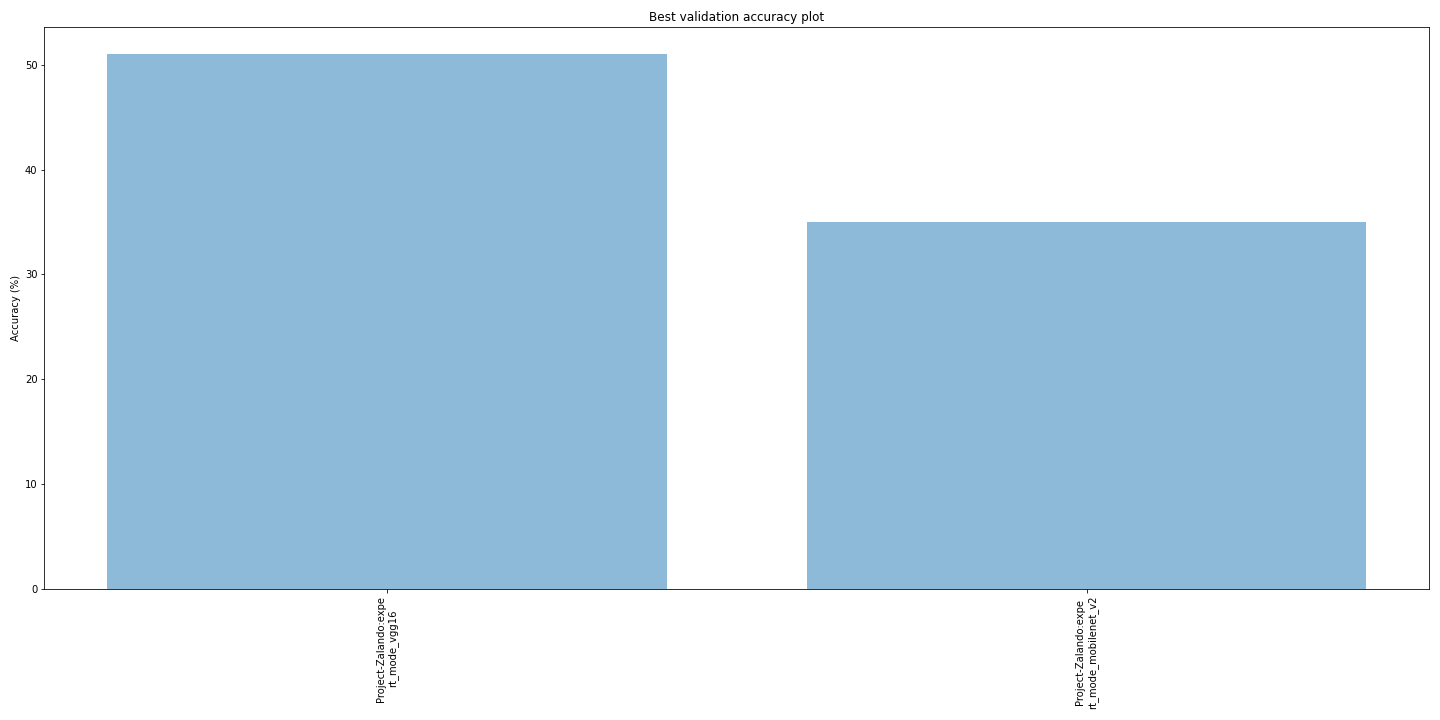

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/Monk_v1/workspace/comparison/vgg-mobilenet-Comparison/stats_best_val_acc.png")

# Conclusion

From the above comparisons, it is clear that the model `vgg16` performed better in every aspect.

There is a lot of room for improving the model's accuracy by further tuning the hyperparameters. Please refer to [Image Classification Zoo](https://github.com/Tessellate-Imaging/monk_v1/tree/master/study_roadmaps/4_image_classification_zoo) for more tutorials.